In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsforecast.models import AutoETS
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

Muita das vezes esperamos que os intervalos de previsão estejam dentro de intervalos definidos como [a, b], podemos tratar isso com algumas transformações.

Se quisermos obter intervalos de previsões positivos, podemos trabalhar com a transformação de log e também podemos aplicar outras transformações na variável resposta prevista para conter um intervalo específico [a, b] utilizando uma transformação logit.
O exemplo abaixo é do livro e leva em conta a transformação logit e a aplicação do Log na previsão.

#### 1.0. Egg Prices

In [21]:
df = pd.read_csv("../data/eggs.csv")

df["logeggs"] = np.log1p(df["eggs"])

df["year"] = pd.to_datetime(df.year, format="%Y")

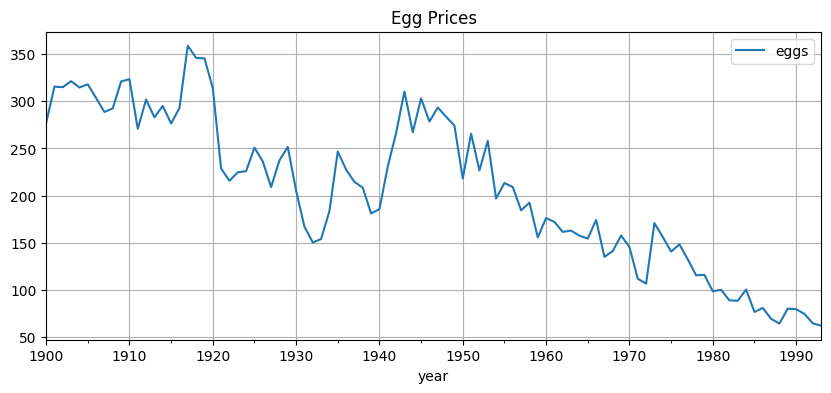

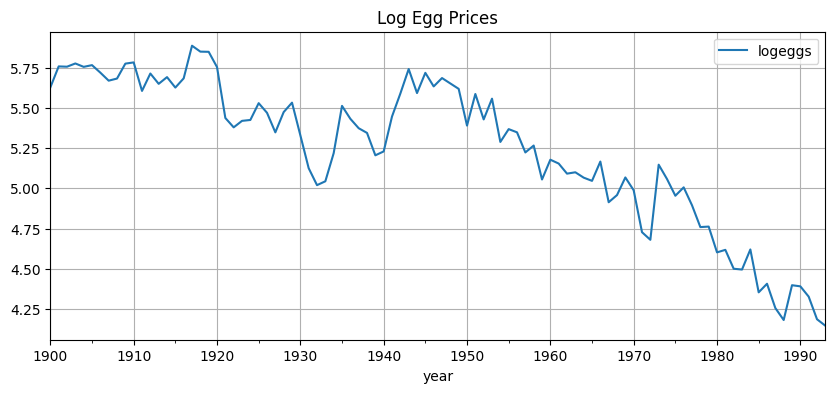

In [22]:
df.plot(x="year", y="eggs", grid=2, figsize=(10, 4), title="Egg Prices");

df.plot(x="year", y="logeggs", grid=2, figsize=(10, 4), title="Log Egg Prices");

In [91]:
ets = AutoETS(
    season_length=1,
    model="AAN"
).fit(df["logeggs"].to_numpy())

forecast = np.expm1(pd.DataFrame(ets.predict(h=50, level=[90])))
forecast["year"] = list(range(df.year.max().year + 1, df.year.max().year + 1 + len(forecast)))
forecast["year"] = pd.to_datetime(forecast["year"], format="%Y")

ets.model_

{'loglik': -21.80816095110939,
 'aic': 53.61632190221878,
 'bic': 66.3327958135688,
 'aicc': 54.29814008403696,
 'mse': 0.01691945124297457,
 'amse': 0.02827047733771898,
 'fit': results(x=array([ 8.08069808e-01,  1.02867327e-02,  5.66303213e+00, -3.58175360e-03]), fn=43.61632190221878, nit=112, simplex=array([[ 8.08162101e-01,  1.04114523e-02,  5.66435801e+00,
         -3.64149830e-03],
        [ 8.08604164e-01,  1.01104795e-02,  5.66614148e+00,
         -3.50364842e-03],
        [ 8.10303593e-01,  1.00122269e-02,  5.66187874e+00,
         -3.45621733e-03],
        [ 8.08069808e-01,  1.02867327e-02,  5.66303213e+00,
         -3.58175360e-03],
        [ 8.12862112e-01,  1.01179666e-02,  5.66277222e+00,
         -3.50853330e-03]])),
 'residuals': array([-3.25849406e-02,  1.27867925e-01,  2.54036098e-02,  2.72129078e-02,
        -1.37588554e-02,  1.02159757e-02, -4.25729639e-02, -5.53763598e-02,
         5.57944894e-03,  9.67477229e-02,  2.82331714e-02, -1.69779415e-01,
         7.893933

In [96]:
forecast

,mean,lo-90,hi-90,year
0,61.917080,49.435236,77.487964,1994-01-01
1,60.955083,45.556882,81.446078,1995-01-01
2,60.007794,42.447844,84.664803,1996-01-01
3,59.074990,39.803510,87.448381,1997-01-01
4,58.156448,37.481930,89.938408,1998-01-01
5,57.251951,35.402952,92.214687,1999-01-01
6,56.361283,33.515900,94.327569,2000-01-01
7,55.484234,31.786210,96.311299,2001-01-01
8,54.620595,30.188991,98.190465,2002-01-01
9,53.770160,28.705563,99.983459,2003-01-01


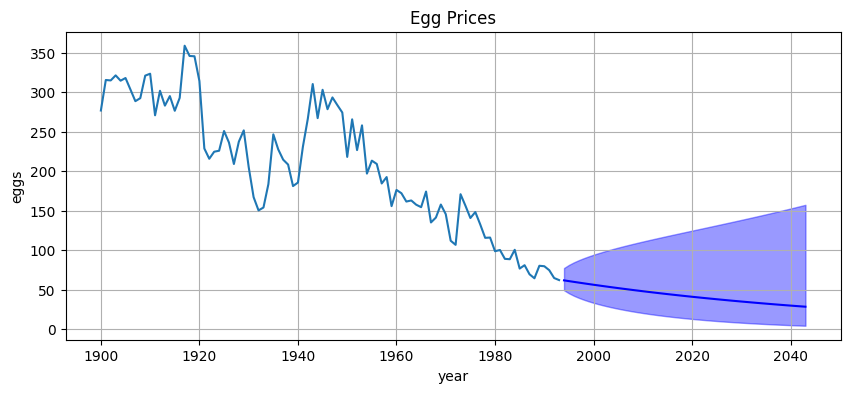

In [95]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(df, x="year", y="eggs", ax=ax)
sns.lineplot(forecast, x="year", y="mean", ax=ax, color="b")
ax.fill_between(forecast["year"], forecast["lo-90"], forecast["hi-90"], color="b", alpha=0.4)
ax.set_title("Egg Prices")
ax.grid(2)

In [100]:
def scaled_logit(x, lower=0, upper=1):
    return np.log1p((x - lower) / (upper - x))

def inv_scaled_logit(x, lower=0, upper=1):
    return (upper - lower) * np.exp(x) / (1 + np.exp(x)) + lower

The book logit function seens not working

In [121]:
s = np.log(np.abs((df["eggs"].to_numpy() - 0) / (1 - df["eggs"].to_numpy())))

(1 - 0) * np.exp(s) / (1 + np.exp(s)) + 0

array([0.50090485, 0.50079385, 0.50079524, 0.50077942, 0.50079608,
       0.5007876 , 0.50082538, 0.50086769, 0.50085634, 0.50078023,
       0.50077428, 0.500925  , 0.50082982, 0.50088499, 0.50084872,
       0.5009059 , 0.50085529, 0.50069778, 0.50072397, 0.50072481,
       0.50079719, 0.50109534, 0.50116139, 0.50111523, 0.50110899,
       0.50099852, 0.50106049, 0.50119835, 0.5010557 , 0.50099534,
       0.50122035, 0.50149961, 0.50166756, 0.50162771, 0.50136485,
       0.5010156 , 0.50110093, 0.50116768, 0.50120244, 0.50138343,
       0.50135011, 0.50108526, 0.50094042, 0.500807  , 0.50093745,
       0.50082636, 0.50089941, 0.50085365, 0.50088302, 0.50091321,
       0.50114879, 0.50094297, 0.50110522, 0.50097087, 0.50127239,
       0.50117437, 0.50119806, 0.5013587 , 0.50130134, 0.50160948,
       0.50142191, 0.50145662, 0.50155154, 0.50153846, 0.50159104,
       0.50162338, 0.5014386 , 0.50185639, 0.50177481, 0.50158902,
       0.50172236, 0.50224095, 0.50235073, 0.50146705, 0.50160